# Undersampling, SMOTE, and running models

## Read Undersampled_data:

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from zipfile import ZipFile
import nbimporter

import performance_measure
import data_sampling
import split_data_set
import lime_method
import target_parser


# The three models
import decision_tree
import random_forest_method
import svm_method_lime_compatible

In [2]:
import pandas_to_latex

In [3]:
path = "../../../undersampled_data.zip"

zip_file = ZipFile(path)
undersampled_data = pd.read_csv(zip_file.open('undersampled_data.csv')) #, nrows=500000)
#data = pd.read_csv(path, compression='zip', sep=',')#, nrows=500000)

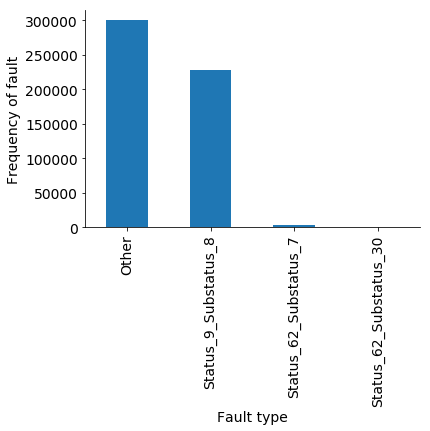

<Figure size 1440x1152 with 0 Axes>

In [4]:
data_sampling.plot_balance(undersampled_data, 'Status')

In [5]:
print(undersampled_data['Status'].value_counts())

Other                     300000
Status_9_Substatus_8      228668
Status_62_Substatus_7       4098
Status_62_Substatus_30       383
Name: Status, dtype: int64


## Do more undersampling

In [6]:
undersampled_data = data_sampling.undersample_dataset(undersampled_data,10000,"Other")
undersampled_data = data_sampling.undersample_dataset(undersampled_data,10000,"Status_9_Substatus_8")

In [7]:
print(undersampled_data['Status'].value_counts())

Other                     10000
Status_9_Substatus_8      10000
Status_62_Substatus_7      4098
Status_62_Substatus_30      383
Name: Status, dtype: int64


# REMOVE THE CELL UNDER; THIS IS JUST FOR TESTING

In [8]:
'''
undersampled_data = data_sampling.undersample_dataset(undersampled_data,300,"Other")
undersampled_data = data_sampling.undersample_dataset(undersampled_data,300,"Status_9_Substatus_8")
undersampled_data = data_sampling.undersample_dataset(undersampled_data,300,"Status_62_Substatus_7")
undersampled_data = data_sampling.undersample_dataset(undersampled_data,300,"Status_62_Substatus_30")
'''

'\nundersampled_data = data_sampling.undersample_dataset(undersampled_data,300,"Other")\nundersampled_data = data_sampling.undersample_dataset(undersampled_data,300,"Status_9_Substatus_8")\nundersampled_data = data_sampling.undersample_dataset(undersampled_data,300,"Status_62_Substatus_7")\nundersampled_data = data_sampling.undersample_dataset(undersampled_data,300,"Status_62_Substatus_30")\n'

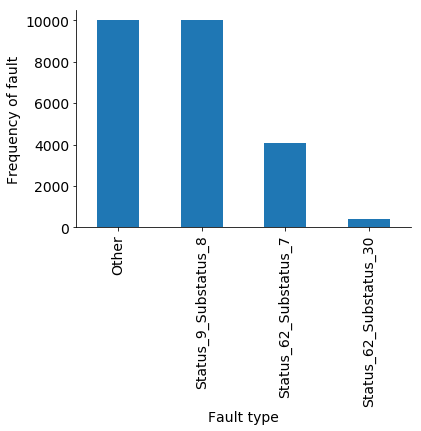

<Figure size 1440x1152 with 0 Axes>

In [9]:
data_sampling.plot_balance(undersampled_data, 'Status')

In [10]:
undersampled_data.head()

,TimeStamp,WindVane,WindSpeed,RotorSpeed,NacelleDirection,ActivePower,Spinner-Temperature,Log-T-Raw-FrontBearingTemperature,Log-T-Raw-RearBearingTemperature,Log-T-Raw-BladeAPitchHeatSink,...,Log-T-Raw-Rectifier2HeatSink,Log-T-Raw-RectifierCabinetTemperature,Log-T-Raw-ExcitationHeatSink,Ambient-Temperature,Log-T-Raw-TowerTemperature,Log-T-Raw-ControlCabinetTemperature,Log-T-Raw-TransformerTemperature,Average blade angle across A B C,WindDirection,Status
0,23-09-2019 17:31:30,-4.700000,7.1,11.710000,110.0,0.0,19.0,29.0,27.0,24.0,...,68.0,37.0,45.0,12.0,20.0,24.0,36.0,17.09,105.300003,Status_9_Substatus_8
1,05-07-2019 10:54:30,-18.300001,7.8,11.750000,308.0,0.0,25.0,30.0,30.0,22.0,...,73.0,35.0,47.0,11.0,17.0,22.0,39.0,15.12,289.700012,Status_9_Substatus_8
2,13-07-2019 10:37:00,-19.400000,3.5,8.679999,297.0,0.0,9.0,22.0,19.0,15.0,...,31.0,25.0,16.0,11.0,14.0,19.0,34.0,1.00,277.600006,Status_9_Substatus_8
3,29-07-2018 20:58:00,3.800000,7.4,16.410000,13.0,617.0,32.0,47.0,43.0,35.0,...,47.0,44.0,47.0,20.0,30.0,34.0,49.0,1.00,16.799999,Other
4,12-09-2019 23:28:30,12.300000,14.1,21.900000,237.0,2316.0,42.0,59.0,31.0,20.0,...,57.0,21.0,38.0,22.0,39.0,38.0,83.0,10.37,249.300003,Status_62_Substatus_7


In [11]:
X = undersampled_data.drop(columns = ['Status', 'TimeStamp'])
y = undersampled_data.Status
y.shape

(24481,)

In [12]:
y.value_counts()

Other                     10000
Status_9_Substatus_8      10000
Status_62_Substatus_7      4098
Status_62_Substatus_30      383
Name: Status, dtype: int64

### Translate statues codes to int for easier comparison

In [33]:
y_codes = target_parser.status_to_code(y)
print(np.asarray(np.unique(y_codes, return_counts=True)).T)

[[    0 10000]
 [    1 10000]
 [    2  4098]
 [    3   383]]


## SMOTE (BEFORE RANDOM FOREST)

In [13]:

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_smote ,y_smote = sm.fit_resample(X, y)
print(X.shape)
print(y.shape)
print(X_smote.shape)
print(y_smote.shape)
print(pd.Series(y_smote).value_counts())
'''
X_test_smote1 ,y_test_smote1 = sm.fit_resample(X_test, y_test)
'''

(24481, 34)
(24481,)
(40000, 34)
(40000,)
Status_62_Substatus_7     10000
Status_62_Substatus_30    10000
Other                     10000
Status_9_Substatus_8      10000
dtype: int64


'\nX_test_smote1 ,y_test_smote1 = sm.fit_resample(X_test, y_test)\n'

## Random forest and feature importance

In [14]:
from sklearn.ensemble import RandomForestClassifier 

rf = RandomForestClassifier(n_estimators=10, random_state=12)

# Smote is on the cross validation
df_rf, y_true, y_pred = performance_measure.cross_validate_model(rf,X,y,smote=True)
performance_measure.confusion_matrix(y_true,y_pred)

# rf = random_forest_method.get_rf_model(pd.DataFrame(X_train_smote1,columns=X_train.columns), pd.DataFrame(X_test_smote1,columns=X_train.columns), y_train_smote1, y_test_smote1)
# rf1 = random_forest_method.get_rf_model(X_train, X_test, y_train, y_test)

# Combine training and test data for cross validation:

rf.fit(X_smote,y_smote)

columns = X.columns
feature_importances = random_forest_method.get_feature_importances(rf, columns)
feature_importances.head()

AVERAGE NONE: 
[0.97014925 0.90697674 0.98086124 0.98677518]
AVERAGE NONE: 
[0.96453202 0.8974359  0.99033816 0.98572885]
AVERAGE NONE: 
[0.978      0.90697674 0.98321343 0.98887765]
AVERAGE NONE: 
[0.97512438 0.97297297 0.99033816 0.98487903]
AVERAGE NONE: 
[0.96825397 0.90243902 0.97619048 0.98876404]
AVERAGE NONE: 
[0.97804391 0.9        0.98321343 0.9908999 ]
AVERAGE NONE: 
[0.96453202 0.90243902 0.98321343 0.98871795]
AVERAGE NONE: 
[0.97993982 0.97368421 0.98557692 0.98395186]
AVERAGE NONE: 
[0.9673913  0.92307692 0.98554217 0.98776758]
AVERAGE NONE: 
[0.979      0.8974359  0.99271845 0.98493976]
The avg accc is:  0.9796170125581345

\begin{tabular}{lll}
\toprule
precision &    recall &    f1\_avg \\
\midrule
 0.965773 &  0.977466 &  0.971376 \\
\bottomrule
\end{tabular}



,importance
Log-T-Raw-TransformerTemperature,0.087858
Log-T-Raw-Rectifier1HeatSink,0.072713
Log-T-Raw-Rotor2Temperature,0.058771
Log-T-Raw-Stator1Temperature,0.057579
Log-T-Raw-Stator2Temperature,0.047782


In [15]:
pandas_to_latex.df_to_latex(feature_importances.head())


\begin{tabular}{r}
\toprule
 importance \\
\midrule
   0.087858 \\
   0.072713 \\
   0.058771 \\
   0.057579 \\
   0.047782 \\
\bottomrule
\end{tabular}



## SVM

### Split data for LIME

In [16]:
X_train, X_test, y_train, y_test = split_data_set.split_data(X,y)
columns_for_data = X_train.columns
y_train.value_counts()
y_test.value_counts()

Other                     3300
Status_9_Substatus_8      3300
Status_62_Substatus_7     1352
Status_62_Substatus_30     127
Name: Status, dtype: int64

### Translate y status codes to ints for lime compatibility

In [34]:
y_train_codes = target_parser.status_to_code(y_train)
y_test_codes  = target_parser.status_to_code(y_test)

print('Counted y_train_codes:')
print(np.asarray(np.unique(y_train_codes, return_counts=True)).T)
print('\nCounted y_test_codes:')
print(np.asarray(np.unique(y_test_codes, return_counts=True)).T)


Counted y_train_codes:
[[   0 6700]
 [   1 6700]
 [   2 2746]
 [   3  256]]

Counted y_test_codes:
[[   0 3300]
 [   1 3300]
 [   2 1352]
 [   3  127]]


### Scale data set for SVM

In [47]:
from sklearn.preprocessing import MinMaxScaler

from sklearn import preprocessing

# Scale the whole dataset first
scaler_whole  = MinMaxScaler()
X_scaled = scaler_whole.fit_transform(X)

# Scale the SMOTE data set:
scaler_whole_smote  = MinMaxScaler()
X_scaled_oversampled = scaler_whole_smote.fit_transform(X_smote)
print(X_scaled_oversampled.shape)

# Scale the train and test, for use with LIME

scaler  = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled.shape)
print(X_test_scaled.shape)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=columns_for_data)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=columns_for_data)
X_train_scaled.head()

(40000, 34)
(16402, 34)
(8079, 34)


,WindVane,WindSpeed,RotorSpeed,NacelleDirection,ActivePower,Spinner-Temperature,Log-T-Raw-FrontBearingTemperature,Log-T-Raw-RearBearingTemperature,Log-T-Raw-BladeAPitchHeatSink,Log-T-Raw-BladeBPitchHeatSink,...,Log-T-Raw-Rectifier1HeatSink,Log-T-Raw-Rectifier2HeatSink,Log-T-Raw-RectifierCabinetTemperature,Log-T-Raw-ExcitationHeatSink,Ambient-Temperature,Log-T-Raw-TowerTemperature,Log-T-Raw-ControlCabinetTemperature,Log-T-Raw-TransformerTemperature,Average blade angle across A B C,WindDirection
0,0.723135,0.030055,0.000000,0.930362,0.000000,0.506667,0.529412,0.5625,0.636364,0.666667,...,0.225806,0.246914,0.545455,0.212766,0.375000,0.433735,0.24,0.262136,0.636305,0.366571
1,0.514837,0.133880,0.458137,0.339833,0.068750,0.546667,0.611765,0.6250,0.584416,0.613333,...,0.655914,0.728395,0.636364,0.510638,0.187500,0.361446,0.08,0.203883,0.053897,0.521251
2,0.495246,0.524590,0.915414,0.685237,0.845833,0.733333,0.741176,0.7375,0.649351,0.706667,...,0.623656,0.604938,0.436364,0.319149,0.562500,0.650602,0.52,0.660194,0.202328,0.760727
3,0.525209,0.234973,0.822241,0.364903,0.477083,0.680000,0.705882,0.8000,0.532468,0.586667,...,0.591398,0.506173,0.454545,0.404255,0.416667,0.602410,0.44,0.514563,0.000000,0.546996
4,0.477096,0.172131,0.462001,0.710306,0.062500,0.533333,0.623529,0.6750,0.675325,0.706667,...,0.580645,0.641975,0.727273,0.478723,0.479167,0.554217,0.42,0.359223,0.000000,0.766244


In [18]:
print(y.shape)
print(X_smote.shape)
print(X_scaled_oversampled.shape)
print(y_smote.shape)

(24481,)
(40000, 34)
(40000, 34)
(40000,)


In [19]:
# Printing the 5 first columns and 5 first rows for the thesis
def head_row_col(dataframe):
    print_df = dataframe.head().iloc[:,[1,2,3,4,5]].copy()
    print_df["..."]="..."
    return print_df

# The scaled set looks like this
pandas_to_latex.df_to_latex(head_row_col(X_train_scaled))


\begin{tabular}{rrrrrl}
\toprule
 WindSpeed &  RotorSpeed &  NacelleDirection &  ActivePower &  Spinner-Temperature &  ... \\
\midrule
  0.030055 &    0.000000 &          0.930362 &     0.000000 &             0.506667 &  ... \\
  0.133880 &    0.458137 &          0.339833 &     0.068750 &             0.546667 &  ... \\
  0.524590 &    0.915414 &          0.685237 &     0.845833 &             0.733333 &  ... \\
  0.234973 &    0.822241 &          0.364903 &     0.477083 &             0.680000 &  ... \\
  0.172131 &    0.462001 &          0.710306 &     0.062500 &             0.533333 &  ... \\
\bottomrule
\end{tabular}



## SMOTE for training and test data

In [52]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_train_scaled_smote ,y_train_smote = sm.fit_resample(X_train_scaled, y_train)
X_train_scaled_smote = pd.DataFrame(X_train_scaled_smote, columns=columns_for_data)


In [53]:
X_train_scaled_smote

,WindVane,WindSpeed,RotorSpeed,NacelleDirection,ActivePower,Spinner-Temperature,Log-T-Raw-FrontBearingTemperature,Log-T-Raw-RearBearingTemperature,Log-T-Raw-BladeAPitchHeatSink,Log-T-Raw-BladeBPitchHeatSink,...,Log-T-Raw-Rectifier1HeatSink,Log-T-Raw-Rectifier2HeatSink,Log-T-Raw-RectifierCabinetTemperature,Log-T-Raw-ExcitationHeatSink,Ambient-Temperature,Log-T-Raw-TowerTemperature,Log-T-Raw-ControlCabinetTemperature,Log-T-Raw-TransformerTemperature,Average blade angle across A B C,WindDirection
0,0.723135,0.030055,0.000000,0.930362,0.000000,0.506667,0.529412,0.562500,0.636364,0.666667,...,0.225806,0.246914,0.545455,0.212766,0.375000,0.433735,0.240000,0.262136,0.636305,0.366571
1,0.514837,0.133880,0.458137,0.339833,0.068750,0.546667,0.611765,0.625000,0.584416,0.613333,...,0.655914,0.728395,0.636364,0.510638,0.187500,0.361446,0.080000,0.203883,0.053897,0.521251
2,0.495246,0.524590,0.915414,0.685237,0.845833,0.733333,0.741176,0.737500,0.649351,0.706667,...,0.623656,0.604938,0.436364,0.319149,0.562500,0.650602,0.520000,0.660194,0.202328,0.760727
3,0.525209,0.234973,0.822241,0.364903,0.477083,0.680000,0.705882,0.800000,0.532468,0.586667,...,0.591398,0.506173,0.454545,0.404255,0.416667,0.602410,0.440000,0.514563,0.000000,0.546996
4,0.477096,0.172131,0.462001,0.710306,0.062500,0.533333,0.623529,0.675000,0.675325,0.706667,...,0.580645,0.641975,0.727273,0.478723,0.479167,0.554217,0.420000,0.359223,0.000000,0.766244
5,0.444540,0.092896,0.057965,0.590529,0.000000,0.573333,0.588235,0.562500,0.649351,0.680000,...,0.279570,0.320988,0.527273,0.255319,0.437500,0.457831,0.260000,0.233010,0.635874,0.655292
6,0.500432,0.234973,0.731644,0.403900,0.282500,0.720000,0.776471,0.662500,0.571429,0.586667,...,0.516129,0.679012,0.545455,0.489362,0.500000,0.638554,0.540000,0.543689,0.000000,0.558030
7,0.503313,0.188525,0.500215,0.732591,0.000000,0.653333,0.670588,0.675000,0.688312,0.693333,...,0.870968,0.938272,0.727273,0.468085,0.458333,0.060241,0.320000,0.349515,0.125472,0.801185
8,0.521175,0.355191,0.905539,0.877437,0.777500,0.586667,0.800000,0.675000,0.545455,0.586667,...,0.548387,0.740741,0.309091,0.287234,0.375000,0.590361,0.460000,0.592233,0.083109,0.920106
9,0.507058,0.256831,0.804208,0.771588,0.431250,0.466667,0.588235,0.550000,0.506494,0.533333,...,0.709677,0.765432,0.490909,0.510638,0.291667,0.397590,0.160000,0.242718,0.221408,0.832448


### Translate y status codes to ints for lime compatibility

In [35]:
y_train_smote_codes = target_parser.status_to_code(y_train_smote)
print(np.asarray(np.unique(y_train_smote_codes, return_counts=True)).T)

[[   0 6700]
 [   1 6700]
 [   2 6700]
 [   3 6700]]


## SVM method

In [21]:
from sklearn.svm import SVC

### BALANCED SVM

AVERAGE NONE: 
[0.75365344 0.0464     0.67115385 0.79151515]
AVERAGE NONE: 
[0.76793249 0.04458599 0.70178926 0.757109  ]
AVERAGE NONE: 
[0.76483051 0.03832753 0.68823529 0.74356103]
AVERAGE NONE: 
[0.74513619 0.03249097 0.68593449 0.757259  ]
AVERAGE NONE: 
[0.74472574 0.03294893 0.66532258 0.74282434]
AVERAGE NONE: 
[0.78012685 0.04643963 0.73210634 0.78333333]
AVERAGE NONE: 
[0.73619632 0.03924647 0.67722772 0.79069767]
AVERAGE NONE: 
[0.76237624 0.03636364 0.71193416 0.7629108 ]
AVERAGE NONE: 
[0.71399177 0.03565891 0.68700787 0.75371287]
AVERAGE NONE: 
[0.77702703 0.03210273 0.66918715 0.77555817]
The avg accc is:  0.5649673971986885

\begin{tabular}{lll}
\toprule
precision &    recall &    f1\_avg \\
\midrule
 0.561974 &  0.620026 &  0.506352 \\
\bottomrule
\end{tabular}

Normalized confusion matrix
[[0.3628     0.3266     0.1397     0.1709    ]
 [0.1383812  0.61879896 0.09138381 0.15143603]
 [0.02464617 0.07125427 0.8511469  0.05295266]
 [0.1028     0.2349     0.0145     0.6478 

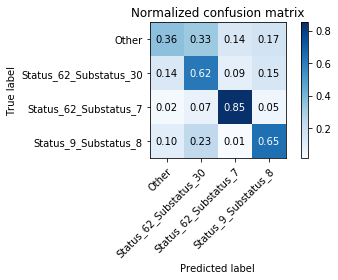

Label_list ['Other' 'Status_62_Substatus_30' 'Status_62_Substatus_7'
 'Status_9_Substatus_8']
Total Accuracy 		0.565

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Other                     	 0.754 		 0.363 		 0.490
Status_62_Substatus_30    	 0.039 		 0.619 		 0.073
Status_62_Substatus_7     	 0.689 		 0.851 		 0.761
Status_9_Substatus_8      	 0.766 		 0.648 		 0.702


In [22]:
# Balanced
svm_balanced = SVC(kernel='poly', gamma='auto', random_state=12,class_weight='balanced')
df_svm_balanced, y_true_svm_balanced, y_pred_svm_balanced = performance_measure.cross_validate_model(svm_balanced,X_scaled,y)
performance_measure.plot_confusion_matrix(y_true_svm_balanced,y_pred_svm_balanced,normalize=True)
#Plot performance measure
performance_measure.get_performance_measures(y_true_svm_balanced, y_pred_svm_balanced)
# svm1 = svm_method.get_svm_model_balanced(X_train_scaled, X_test_scaled, y_train, y_test)

### UNBALANCED SVM

AVERAGE NONE: 
[0.66246625 0.76142132 0.77860169]
AVERAGE NONE: 
[0.65445026 0.80810811 0.76098607]
AVERAGE NONE: 
[0.65801253 0.8038674  0.75773196]
AVERAGE NONE: 
[0.66576819 0.7983871  0.7642783 ]
AVERAGE NONE: 
[0.64809903 0.78994083 0.74259448]
AVERAGE NONE: 
[0.67889088 0.83646113 0.78369906]
AVERAGE NONE: 
[0.66212534 0.76612903 0.76820513]
AVERAGE NONE: 
[0.64825828 0.80645161 0.78064516]
AVERAGE NONE: 
[0.64273356 0.80108992 0.75      ]
AVERAGE NONE: 
[0.67609489 0.79123711 0.7694704 ]
The avg accc is:  0.721334869844416

\begin{tabular}{lll}
\toprule
precision &    recall &    f1\_avg \\
\midrule
  0.74054 &  0.729154 &  0.732957 \\
\bottomrule
\end{tabular}

Normalized confusion matrix
[[0.743      0.         0.0626     0.1944    ]
 [0.73629243 0.         0.08355091 0.18015666]
 [0.23133236 0.         0.71425085 0.05441679]
 [0.2606     0.         0.0092     0.7302    ]]


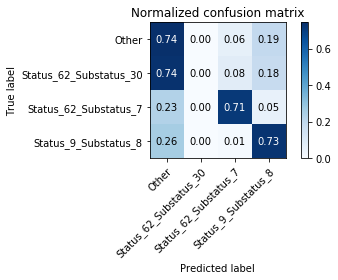

Label_list ['Other' 'Status_62_Substatus_30' 'Status_62_Substatus_7'
 'Status_9_Substatus_8']
Total Accuracy 		0.721

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Other                     	 0.660 		 0.743 		 0.699
Status_62_Substatus_30    	 0.000 		 0.000 		 0.000
Status_62_Substatus_7     	 0.796 		 0.714 		 0.753
Status_9_Substatus_8      	 0.766 		 0.730 		 0.747


/Users/mortenolsenosvik/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mortenolsenosvik/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [23]:
# Unbalanced
svm_unbalanced = SVC(kernel='poly', gamma='auto', random_state=12)
df_svm_unbalanced, y_true_svm_unbalanced, y_pred_svm_unbalanced = performance_measure.cross_validate_model(svm_unbalanced,X_scaled,y)
performance_measure.plot_confusion_matrix(y_true_svm_unbalanced,y_pred_svm_unbalanced,normalize=True)
#Plot performance measure
performance_measure.get_performance_measures(y_true_svm_unbalanced, y_pred_svm_unbalanced)
# svm2 = svm_method.get_svm_model(X_train_scaled, X_test_scaled, y_train, y_test)

### UNBALANCED AND SMOTE SVM (USE THIS RESULT Best results for 62_30)!

AVERAGE NONE: 
[0.76811594 0.05090312 0.7108209  0.84574468]
AVERAGE NONE: 
[0.7891791  0.05031447 0.73359841 0.80620155]
AVERAGE NONE: 
[0.77396022 0.03979239 0.7311412  0.79525593]
AVERAGE NONE: 
[0.7785124  0.04099822 0.73242188 0.82337662]
AVERAGE NONE: 
[0.7539267  0.0385906  0.72310757 0.79279279]
AVERAGE NONE: 
[0.78825623 0.0416     0.76161616 0.82898172]
AVERAGE NONE: 
[0.75272727 0.04361371 0.71345029 0.83983849]
AVERAGE NONE: 
[0.77990431 0.04042179 0.74949084 0.83311432]
AVERAGE NONE: 
[0.73097345 0.03961965 0.74007937 0.80053548]
AVERAGE NONE: 
[0.798      0.03525641 0.70188679 0.81588903]
The avg accc is:  0.5963387805441062

\begin{tabular}{lll}
\toprule
precision &    recall &    f1\_avg \\
\midrule
  0.59035 &  0.659558 &  0.538462 \\
\bottomrule
\end{tabular}

Normalized confusion matrix
[[0.4336     0.3295     0.1208     0.1161    ]
 [0.19321149 0.66840731 0.08355091 0.05483029]
 [0.02806247 0.01073694 0.90824793 0.05295266]
 [0.1098     0.2476     0.0141     0.6285 

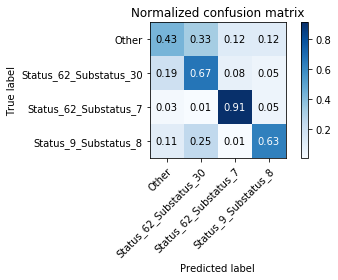

Label_list ['Other' 'Status_62_Substatus_30' 'Status_62_Substatus_7'
 'Status_9_Substatus_8']
Total Accuracy 		0.596

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Other                     	 0.771 		 0.434 		 0.555
Status_62_Substatus_30    	 0.042 		 0.668 		 0.079
Status_62_Substatus_7     	 0.729 		 0.908 		 0.809
Status_9_Substatus_8      	 0.818 		 0.628 		 0.711


In [24]:
svm_unbalanced_smote = SVC(kernel='poly', gamma='auto', random_state=12)
df_svm_unbalanced_smote, y_true_svm_unbalanced_smote, y_pred_svm_unbalanced_smote = performance_measure.cross_validate_model(svm_unbalanced,X_scaled,y,smote=True)
performance_measure.plot_confusion_matrix(y_true_svm_unbalanced_smote,y_pred_svm_unbalanced_smote,normalize=True)
performance_measure.get_performance_measures(y_true_svm_unbalanced_smote, y_pred_svm_unbalanced_smote)
# svm3 = svm_method.get_svm_model(X_train_scaled_smote, X_test_scaled_smote, y_train_smote, y_test_smote)

### SMOTE and class_weight balanced

In [25]:
print(X_train_scaled_smote.shape)
print(y_train.shape)
print(X_test_scaled_smote.shape)
print(y_test.shape)
print(y.value_counts())


(26800, 34)
(16402,)
(13200, 34)
(8079,)
Other                     10000
Status_9_Substatus_8      10000
Status_62_Substatus_7      4098
Status_62_Substatus_30      383
Name: Status, dtype: int64


AVERAGE NONE: 
[0.76554174 0.04966887 0.70973783 0.84759358]
AVERAGE NONE: 
[0.78584392 0.04967949 0.73852295 0.80465718]
AVERAGE NONE: 
[0.77540107 0.04088586 0.73425197 0.79697352]
AVERAGE NONE: 
[0.77339901 0.03963964 0.72957198 0.82467532]
AVERAGE NONE: 
[0.74742268 0.04026846 0.72079208 0.79869281]
AVERAGE NONE: 
[0.79115044 0.04361874 0.76470588 0.82879377]
AVERAGE NONE: 
[0.75406872 0.04361371 0.71456311 0.84552846]
AVERAGE NONE: 
[0.7816092  0.04130809 0.75449102 0.8335535 ]
AVERAGE NONE: 
[0.73498233 0.04058442 0.73622047 0.79656539]
AVERAGE NONE: 
[0.79563492 0.03481013 0.70454545 0.82247765]
The avg accc is:  0.5973600224832366

\begin{tabular}{lll}
\toprule
precision &   recall &    f1\_avg \\
\midrule
 0.590901 &  0.66112 &  0.539469 \\
\bottomrule
\end{tabular}

Normalized confusion matrix
[[0.4362     0.3291     0.1205     0.1142    ]
 [0.19060052 0.67101828 0.08355091 0.05483029]
 [0.02733041 0.00951684 0.9102001  0.05295266]
 [0.1116     0.2469     0.014      0.6275   

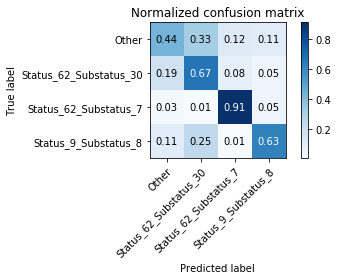

Label_list ['Other' 'Status_62_Substatus_30' 'Status_62_Substatus_7'
 'Status_9_Substatus_8']
Total Accuracy 		0.597

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Other                     	 0.770 		 0.436 		 0.557
Status_62_Substatus_30    	 0.042 		 0.671 		 0.080
Status_62_Substatus_7     	 0.730 		 0.910 		 0.810
Status_9_Substatus_8      	 0.820 		 0.627 		 0.711


In [26]:
svm_balanced_smote = SVC(kernel='poly', gamma='auto', random_state=12,class_weight='balanced')

df_svm_balanced_smote, y_true_svm_balanced_smote, y_pred_svm_balanced_smote = performance_measure.cross_validate_model(svm_balanced_smote,X_scaled,y,smote=True)
performance_measure.plot_confusion_matrix(y_true_svm_balanced_smote,y_pred_svm_balanced_smote,normalize=True)
performance_measure.get_performance_measures(y_true_svm_balanced_smote, y_pred_svm_balanced_smote)
# balanced with smote and undersampling
# svm4 = svm_method.get_svm_model_balanced(X_train_scaled_smote, X_test_scaled_smote, y_train_smote, y_test_smote)

### SMOTE and probability

Loading...
Training...
Training Complete
Plotting Confusion Matrix...
Normalized confusion matrix
[[0.42363636 0.18454545 0.12181818 0.27      ]
 [0.11242424 0.69969697 0.01121212 0.17666667]
 [0.02736686 0.04511834 0.91715976 0.01035503]
 [0.18897638 0.15748031 0.06299213 0.59055118]]


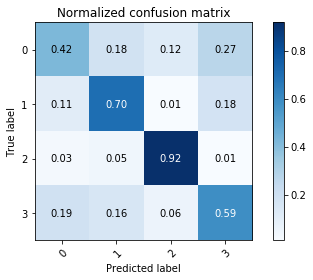

Plotting Performance Measure...
Label_list [0 1 2 3]
Total Accuracy 		0.622

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
0                         	 0.764 		 0.424 		 0.545
1                         	 0.770 		 0.700 		 0.733
2                         	 0.735 		 0.917 		 0.816
3                         	 0.048 		 0.591 		 0.089


In [36]:
svm_prob_smote = svm_method_lime_compatible.get_svm_model_balanced_with_prob(X_train_scaled_smote, 
                                                                             X_test_scaled, 
                                                                             y_train_smote_codes, 
                                                                             y_test_codes)

#### Run Lime Metod on 

In [37]:
svm_prob_smote.classes_

array([0, 1, 2, 3])

In [62]:
targetNames = svm_prob_smote.classes_
explainer = lime_method.run_lime(X_train_scaled_smote, targetNames)
exp_instance = lime_method.explain_instance(X_test_scaled, svm_prob_smote, explainer, 2)
exp_instance.show_in_notebook(show_table=True) #, show_all=True)

In [61]:
exp_instance.save_to_file('../Data_Plots/lime/test')

## Decision tree model

### Remove the features from the random forest model called rf


In [ ]:
# rf_df = pd.DataFrame(feature_importances)
rf_df = feature_importances

rf_df_extracted = rf_df.head(6)
rf_df_extracted.reset_index()
include_features = rf_df_extracted.index
list_of_features = include_features.tolist()

# The selected features in a list
df_selected_features = pd.DataFrame(list_of_features)
df_selected_features.columns = ['Selected features for decision tree']
df_selected_features

### Convert the selected DT variables to LATEX

In [ ]:
# Print to latex
pandas_to_latex.df_to_latex(df_selected_features)

In [ ]:
# Make the feature names more readable by removing "LOG-" etc.
shorter_feature_names = []
for i, s in enumerate(list_of_features):
    split = s.split("Log-T-Raw-")
    print(split)
    if (len(split)>1):
        shorter_feature_names.append(split[1])
    else:
        shorter_feature_names.append(split[0])
shorter_feature_names

### Evaluate Decision tree model

#### Setting depth for tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier
DEPTH = 3

In [ ]:
X_dt = X[include_features.tolist()]
clf_df = DecisionTreeClassifier(criterion = "entropy", random_state=12,max_depth = DEPTH)

df_dt, y_true_dt, y_pred_dt = performance_measure.cross_validate_model(clf_df,X_dt,y,smote=True)
performance_measure.plot_confusion_matrix(y_true_dt,y_pred_dt,normalize=True)


In [ ]:
import numpy as np

# Training the DT with the SMOTE data (all of it)

X_smote_with_names = (pd.DataFrame(X_smote))
X_smote_with_names.columns = columns_for_data


# data = X_train_scaled_with_names[np.intersect1d(X_train_scaled_with_names, list_of_features)]

# Only including the features in from the Random Forest feature imporances
X_smote_filtered = X_smote_with_names[include_features.tolist()]

# Printing df
X_smote_filtered.head()

In [ ]:
col_rename_dict = {i:j for i,j in zip(X_smote_filtered.columns,shorter_feature_names)}
X_smote_filtered.rename(columns=col_rename_dict, inplace=True)

# X_test_scaled_removed.rename(columns={include_features : shorter_feature_names})
X_smote_filtered.head()

### Training the DT

In [ ]:
# Train DT on these features and print it out:

clf_df = DecisionTreeClassifier(criterion = "entropy", random_state=12,max_depth = DEPTH)
clf_df.fit(X_smote_filtered,y_smote)


# dt_depth3 = decision_tree.get_decision_tree_model(X_train_scaled_removed, X_test_scaled_removed, y_train_smote, y_test_smote,3)
# dt_depth2 = decision_tree.get_decision_tree_model(X_train_scaled_removed, X_test_scaled_removed, y_train_smote, y_test_smote,2)

In [ ]:
# Print the tree
import pydotplus
from sklearn.datasets import load_iris
from sklearn import tree
import collections

def save_tree(dt,name):
    dot_data = tree.export_graphviz(dt,
                                    feature_names=X_smote_filtered.columns,
                                    out_file=None,
                                    filled=True,
                                    rounded=True)
    graph = pydotplus.graph_from_dot_data(dot_data)

    colors = ('powderblue', 'orange')
    edges = collections.defaultdict(list)

    for edge in graph.get_edge_list():
        edges[edge.get_source()].append(int(edge.get_destination()))

    for edge in edges:
        edges[edge].sort()    
        for i in range(2):
            dest = graph.get_node(str(edges[edge][i]))[0]
            dest.set_fillcolor(colors[i])

    # Exporting image to current directory
    graph.write_png('../Data_Plots/decision_trees/{}.png'.format(name))

In [ ]:
save_tree(clf_df,"depth3")
# save_tree(dt_depth3,"depth3")